In [1]:
#Add Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from citipy import citipy
import gmaps
import gmaps.datasets
import scipy.stats as stats
from datetime import datetime
#import folium

## Importing CSV Data



In [40]:
#Import citation data from csv
citation_raw = pd.read_csv("Parking_Citations.csv")
citation_df = citation_raw

C:\Users\kapali_s\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
#Name of columns 
#citation_df.columns.tolist()

## Cleaning Columns from Dataset

In [4]:
#Drop columns that are not needed
citation_df1 = citation_df.drop(["Meter Id","Marked Time","RP State Plate","Plate Expiry Date","VIN","Location","Route","Agency","Violation code","Body Style", "Violation Description", "Fine amount"], axis = 1)
citation_df1.head()

#Drop Lat and Lon = 99999
citation_df2 = citation_df1[(citation_df1["Latitude"] !=99999.000) & (citation_df1["Longitude"] !=99999.000)]
citation_df2.head()


,Ticket number,Issue Date,Issue time,Make,Color,Latitude,Longitude
0,1114684152,5/1/2018,1310.0,GMC,BK,6468879.186,1841441.836
39,1121020504,5/1/2018,1100.0,CHEV,SI,6487917.292,1830966.052
41,1116268053,5/1/2018,1211.0,SUBA,RE,6443160.675,1921957.696
45,1117163961,5/1/2018,1045.0,TOYO,BK,6401115.821,1887444.261
46,1117163950,5/1/2018,2135.0,TOYO,GY,6397793.249,1886756.686


In [5]:
citation_df2.count()

Ticket number    419378
Issue Date       419378
Issue time       419303
Make             419187
Color            419316
Latitude         419377
Longitude        419377
dtype: int64

In [6]:
#Take all rows where column values are not equal to zero
citation_df3 = citation_df2[(citation_df2[["Ticket number", "Issue Date","Issue time","Make","Color","Latitude","Longitude",]] != 0)]
citation_df3.head()

,Ticket number,Issue Date,Issue time,Make,Color,Latitude,Longitude
0,1114684152,5/1/2018,1310.0,GMC,BK,6468879.186,1841441.836
39,1121020504,5/1/2018,1100.0,CHEV,SI,6487917.292,1830966.052
41,1116268053,5/1/2018,1211.0,SUBA,RE,6443160.675,1921957.696
45,1117163961,5/1/2018,1045.0,TOYO,BK,6401115.821,1887444.261
46,1117163950,5/1/2018,2135.0,TOYO,GY,6397793.249,1886756.686


In [7]:
#Drop all rows with blank cells
citation_df4 = citation_df3.fillna("")

In [38]:
#citation_df4.count()

In [9]:
citation_df4["Make"].replace("", np.nan, inplace=True)
citation_df4.dropna(subset = ["Make"], inplace = True)

In [37]:
#Sort values by make of car
#citation_df4.sort_values(["Make"],ascending=True)

In [14]:
Sample_data = citation_df4.sample(frac=0.10, random_state = 1 )

In [15]:
Sample_data.head()

,Ticket number,Issue Date,Issue time,Make,Color,Latitude,Longitude
411923,4336360221,7/13/2018,2332,TOYT,BL,6.42472e+06,1.80822e+06
143651,4332707271,5/24/2018,2204,SUBA,WT,6.46008e+06,1.85883e+06
275230,4334502561,6/18/2018,1209,BMW,WT,6.37875e+06,1.8836e+06
272531,4333701352,6/17/2018,2125,HOND,BK,6.45809e+06,1.85907e+06
140789,4333176363,5/24/2018,1646,OTHR,BN,6.48442e+06,1.83663e+06


In [36]:
#Replace duplicates for all makes in top 30
citation_df4["Make"] = citation_df4["Make"].replace({'TOYT': 'TOYOTA', 'TOYO': 'TOYOTA'})
citation_df5 = citation_df4["Make"].value_counts()
citation_df6 = citation_df5.rename_axis('Make').reset_index(name='counts')
citation_df7 = citation_df6.head(25)

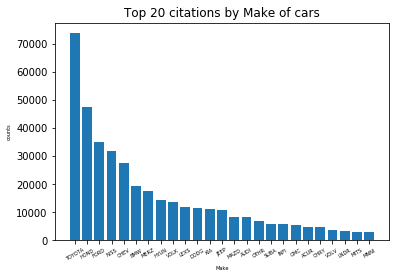

In [18]:
#Bar plot for top 25 make of vehicles that got citations
x_axis=np.arange(len(citation_df7["Make"]))
plt.bar(x_axis,citation_df7["counts"] )
plt.xlabel('Make', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.xticks(x_axis, citation_df6["Make"], fontsize=5, rotation=30)
plt.title('Top 20 citations by Make of cars')
plt.show()

In [35]:
#Replace duplicates for all makes in top 30
citation_df8 = citation_df4["Color"].value_counts()
citation_df9 = citation_df8.rename_axis('Color').reset_index(name='Counts')
citation_df10 = citation_df9.head(25)

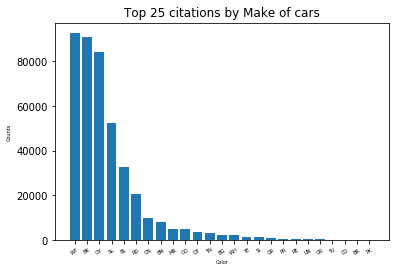

In [20]:
#Bar plot for top 25 Color of vehicles that got citations
x_axis=np.arange(len(citation_df10["Color"]))
plt.bar(x_axis,citation_df10["Counts"] )
plt.xlabel('Color', fontsize=5)
plt.ylabel('Counts', fontsize=5)
plt.xticks(x_axis, citation_df10["Color"], fontsize=5, rotation=30)
plt.title('Top 25 citations by color of cars')
plt.show()

In [60]:
# Sampling the models of four cars 
df1 = Sample_data[Sample_data.Make.isin(["BMW","FORD","VOLK","DODG"])]
df1.head()

,Ticket number,Issue Date,Issue time,Make,Color,Latitude,Longitude
275230,4334502561,6/18/2018,1209,BMW,WT,6.37875e+06,1.8836e+06
123283,4333349086,5/22/2018,257,BMW,BK,6.45597e+06,1.82743e+06
141528,4333111554,5/24/2018,1119,FORD,WT,6.44513e+06,1.84288e+06
461871,4334551745,7/23/2018,1008,BMW,BK,6.45501e+06,1.85367e+06
325517,4334289783,6/26/2018,1219,FORD,WT,6.45788e+06,1.85907e+06


In [45]:
# Group by make of the cars
df2 = df1.groupby("Make").Make.count()

In [46]:
Sample_data_large = citation_df4.sample(frac=0.50, random_state = 1 )

In [47]:
df3 = Sample_data_large[Sample_data_large.Make.isin(["BMW","FORD","VOLK","DODG"])]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39837 entries, 275230 to 411751
Data columns (total 7 columns):
Ticket number    39837 non-null object
Issue Date       39837 non-null object
Issue time       39837 non-null object
Make             39837 non-null object
Color            39837 non-null object
Latitude         39837 non-null object
Longitude        39837 non-null object
dtypes: object(7)
memory usage: 2.4+ MB


In [48]:
df3 = df3.groupby("Make").Make.count()
df3

Make
BMW      9678
DODG     5885
FORD    17511
VOLK     6763
Name: Make, dtype: int64

In [49]:
Observed = df2
Observed

Make
BMW     1972
DODG    1146
FORD    3464
VOLK    1323
Name: Make, dtype: int64

In [50]:
Observed = pd.DataFrame(Observed)
Observed

,Make
Make,
BMW,1972
DODG,1146
FORD,3464
VOLK,1323


In [51]:
Observed.columns.values[0]="Observed"
Observed

,Observed
Make,
BMW,1972
DODG,1146
FORD,3464
VOLK,1323


In [52]:
overall_ratio = (df3/len(df3)).round(0)
overall_ratio

Make
BMW     2420.0
DODG    1471.0
FORD    4378.0
VOLK    1691.0
Name: Make, dtype: float64

In [53]:
Expected = overall_ratio * len(Observed)
Expected

Make
BMW      9680.0
DODG     5884.0
FORD    17512.0
VOLK     6764.0
Name: Make, dtype: float64

In [54]:
Expected= pd.DataFrame(Expected)

In [55]:
Expected.columns.values[0] = "Expected"
Expected

,Expected
Make,
BMW,9680.0
DODG,5884.0
FORD,17512.0
VOLK,6764.0


In [56]:
Combined =  pd.concat([Observed, Expected], axis = 1)
Combined

,Observed,Expected
Make,,
BMW,1972,9680.0
DODG,1146,5884.0
FORD,3464,17512.0
VOLK,1323,6764.0


In [58]:
#With fur raws, the degree of freedom is 3
# with a p-value of 0.05, the CL is 1-0.05 = 0.95
Critcal_value = stats.chi2.ppf(q=0.95, df = 3)
Critcal_value

7.814727903251179

In [59]:
stats.chisquare(Combined["Observed"], Combined["Expected"])

Power_divergenceResult(statistic=25598.91059996524, pvalue=0.0)